<a href="https://colab.research.google.com/github/UliksSekiraqa/StockMarketAnalysis/blob/master/Twitter_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install GetOldTweets3

# **Part 1 - Training a text classification model using the *Sentiment140* dataset**

##**Step 1. Load the dataset**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving sentiment140.csv to sentiment140.csv


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
# labels
POSITIVE = "Positive"
NEGATIVE = "Negative"
NEUTRAL = "Neutral"

In [ ]:
# the 'target' column contains labeled sentiments
DATASET_COLUMNS = ["target", "id", "date", "flag", "user", "text"] 
sentiment = pd.read_csv('sentiment140.csv', names=DATASET_COLUMNS, encoding='latin', 
                        engine='python', error_bad_lines=False)

sentiment.head()

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
# train only on 'text' to classify the 'sentiment' -> drop the other unnecessary columns
sentiment = sentiment.drop(['id', 'date', 'flag', 'user'], axis=1)
sentiment

,target,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."
...,...,...
1599995,4,Just woke up. Having no school is the best fee...
1599996,4,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,Happy 38th Birthday to my boo of alll time!!! ...


In [ ]:
sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   text    1600000 non-null  object
dtypes: int64(1), object(1)
memory usage: 24.4+ MB


In [ ]:
sentiment['target'].unique()

array([0, 4])

In [ ]:
# label the sentiment: [0]: Negative, [4]: Positive
label_to_sentiment = {0:NEGATIVE, 4:POSITIVE}

def label_decoder(label):
    return label_to_sentiment[label]

sentiment['target'] = sentiment['target'].apply(lambda x: label_decoder(x))
sentiment

,target,text
0,Negative,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,Negative,is upset that he can't update his Facebook by ...
2,Negative,@Kenichan I dived many times for the ball. Man...
3,Negative,my whole body feels itchy and like its on fire
4,Negative,"@nationwideclass no, it's not behaving at all...."
...,...,...
1599995,Positive,Just woke up. Having no school is the best fee...
1599996,Positive,TheWDB.com - Very cool to hear old Walt interv...
1599997,Positive,Are you ready for your MoJo Makeover? Ask me f...
1599998,Positive,Happy 38th Birthday to my boo of alll time!!! ...


Text(0.5, 1.0, 'Sentiment Data Distribution')

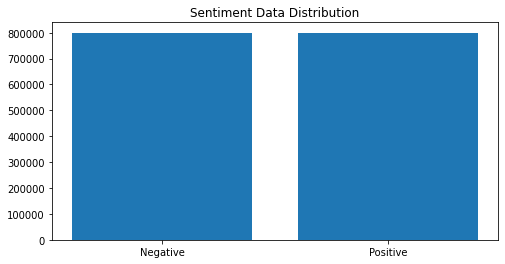

In [ ]:
val_count = sentiment['target'].value_counts()
#Plot the number of positive vs negative sentiment tweets
plt.figure(figsize=(8,4))
plt.bar(val_count.index, val_count.values)
plt.title("Sentiment Data Distribution")

As can be seen, the dataset dose not have any skewness, which is ideal.

##**Step 2. Text Preprocessing**
1. Remove stopwords, punctuations, hyperlinks and mentions
2. Lammetization/stemming: tranforming any form of a word to its root word

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop_words = stopwords.words("english")
stemmer = SnowballStemmer("english")

In [ ]:
import re
TEXT_CLEANING_RE = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

In [ ]:
def preprocess(text):
    text = re.sub(TEXT_CLEANING_RE, ' ', str(text).lower()).strip()
    tokens = []
   
    for token in text.split():
        if token not in stop_words:
            tokens.append(stemmer.stem(token))
   
    return " ".join(tokens)

In [ ]:
sentiment['text'] = sentiment['text'].apply(lambda x: preprocess(x))
sentiment

,target,text
0,Negative,awww bummer shoulda got david carr third day
1,Negative,upset updat facebook text might cri result sch...
2,Negative,dive mani time ball manag save 50 rest go bound
3,Negative,whole bodi feel itchi like fire
4,Negative,behav mad see
...,...,...
1599995,Positive,woke school best feel ever
1599996,Positive,thewdb com cool hear old walt interview
1599997,Positive,readi mojo makeov ask detail
1599998,Positive,happi 38th birthday boo alll time tupac amaru ...


####**Word cloud visualizations of the pre-processed positive and negative words.**

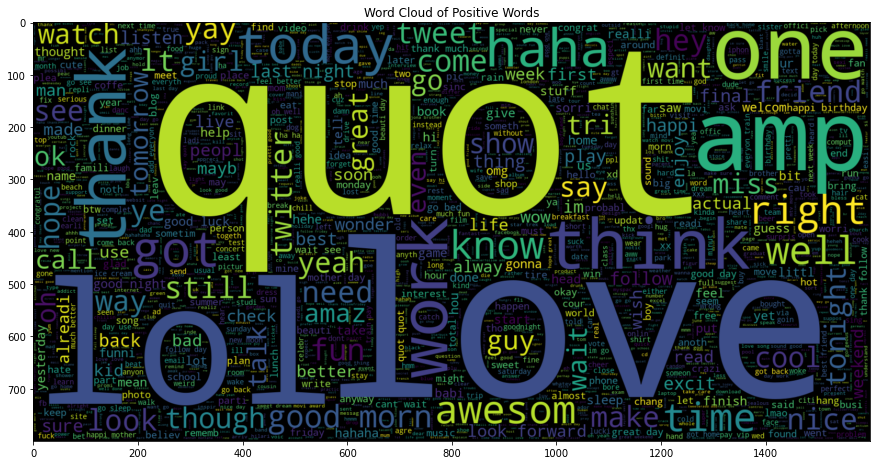

In [ ]:
from wordcloud import WordCloud

plt.figure(figsize = (15,15)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800)\
              .generate(" ".join(sentiment[sentiment['target'] == POSITIVE]['text']))
plt.title("Word Cloud of Positive Words")
plt.imshow(wc , interpolation = 'bilinear')

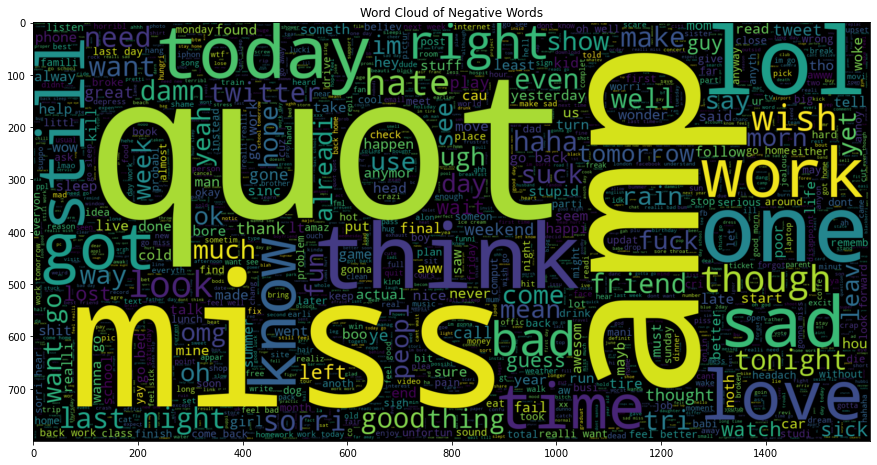

In [ ]:
plt.figure(figsize = (15,15)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800)\
              .generate(" ".join(sentiment[sentiment['target'] == NEGATIVE]['text']))
plt.title("Word Cloud of Negative Words")
plt.imshow(wc , interpolation = 'bilinear')

##**Step 3. Split train and test dataset**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
TRAIN_SIZE = 0.8

sentiment_train, sentiment_test = train_test_split(sentiment, test_size=1-TRAIN_SIZE, random_state=42)
print("Train size:", len(sentiment_train))
print("Test size:", len(sentiment_test))

Train size: 1280000
Test size: 320000


####**Check the distribution of positive and negative tweets in testing & training set.**

In [ ]:
y = pd.DataFrame(sentiment_train, columns=['target'])

print("Checking the training set:")
print(len(y.loc[sentiment['target'] == POSITIVE]) / len(y) * 100)
print(len(y.loc[sentiment['target'] == NEGATIVE]) / len(y) * 100)

Checking the training set:
49.96046875
50.03953125


In [ ]:
y_ = pd.DataFrame(sentiment_test, columns=['target'])

print("Checking the testing set:")
print(len(y_.loc[sentiment['target'] == POSITIVE]) / len(y_) * 100)
print(len(y_.loc[sentiment['target'] == NEGATIVE]) / len(y_) * 100)

Checking the testing set:
50.158125
49.841875


As can be seen, the split is correct since both training & testing set keep the original proportion of Positive:Negative tweets (approx. 1:1).

##**Step 4. Tokenization:** Chopping a character sequence up into pieces (tokens).

In [ ]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentiment_train['text'])

word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1
print("Vocabulary Size :", vocab_size)

Using TensorFlow backend.


Vocabulary Size : 248736


In [ ]:
# Pad the tweets to ensure there is no variance on count of words in them.
from keras.preprocessing.sequence import pad_sequences

MAX_SEQUENCE_LENGTH = 30

x_train = pad_sequences(tokenizer.texts_to_sequences(sentiment_train['text']),
                        maxlen = MAX_SEQUENCE_LENGTH)
x_test = pad_sequences(tokenizer.texts_to_sequences(sentiment_test['text']),
                       maxlen = MAX_SEQUENCE_LENGTH)

print("Training X Shape: ", x_train.shape)
print("Testing X Shape: ", x_test.shape)

Training X Shape:  (1280000, 30)
Testing X Shape:  (320000, 30)


##**Step 5. Label Encoding**

In [ ]:
labels = sentiment_train['target'].unique().tolist()
labels

['Positive', 'Negative']

In [ ]:
encoder = LabelEncoder()
encoder.fit(sentiment_train['target'].to_list())

y_train = encoder.transform(sentiment_train['target'].to_list())
y_test = encoder.transform(sentiment_test['target'].to_list())

# reshape the results to be in 1D
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

y_train shape: (1280000, 1)
y_test shape: (320000, 1)


##**Step 6. Word Embedding** using Word2Vec

In [ ]:
import gensim

W2V_SIZE = 300
W2V_WINDOW = 7
W2V_EPOCH = 32
W2V_MIN_COUNT = 10

In [ ]:
w2v_model = gensim.models.word2vec.Word2Vec(size=W2V_SIZE, 
                                            window=W2V_WINDOW, 
                                            min_count=W2V_MIN_COUNT, 
                                            workers=8)

In [ ]:
documents = [_text.split() for _text in sentiment_train['text']]
w2v_model.build_vocab(documents)

In [ ]:
words = w2v_model.wv.vocab.keys()
vocab_size = len(words)
print("Vocab size: ", vocab_size)

Vocab size 23654


In [ ]:
w2v_model.train(documents, total_examples=len(documents), epochs=W2V_EPOCH)

(259088479, 295270528)

In [ ]:
w2v_model.wv.most_similar("love")

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('amaz', 0.5858823657035828),
 ('luv', 0.529019832611084),
 ('awesom', 0.5161921977996826),
 ('looov', 0.5047914385795593),
 ('ador', 0.46369171142578125),
 ('beauti', 0.4302016496658325),
 ('lovee', 0.42214900255203247),
 ('loveeee', 0.4173901081085205),
 ('great', 0.41216349601745605),
 ('loov', 0.4034198224544525)]

In [ ]:
embedding_matrix = np.zeros((vocab_size, W2V_SIZE))
for word, i in tokenizer.word_index.items():
    if word in w2v_model.wv:
        embedding_matrix[i] = w2v_model.wv[word]

print(embedding_matrix.shape)

(248736, 300)


In [ ]:
from keras.layers import Embedding

embedding_layer = Embedding(vocab_size, W2V_SIZE, weights=[embedding_matrix], 
                            input_length=MAX_SEQUENCE_LENGTH, trainable=False)

##**Step 7. Model Training** using LSTM
Model used: **Sequence Models**

For model architecture, we used:
1. Embedding Layer - Generating Embedding Vector for each input sequence.
2. Conv1D Layer - Convolving data into smaller feature vectors.
3. LSTM (Long Short Term Memory) - Having memory state cell to learn the context of words which are at further along the text to carry contextual meaning.
4. Dense - Fully connected layers for classification.

![alt text](https://miro.medium.com/max/1458/1*SICYykT7ybua1gVJDNlajw.png)

In [ ]:
from keras.models import Sequential
from keras.layers import Dropout, LSTM, Dense

In [ ]:
model = Sequential()
model.add(embedding_layer)
model.add(Dropout(0.5))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 30, 300)           74620800  
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 300)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 74,781,301
Trainable params: 160,501
Non-trainable params: 74,620,800
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])

In [ ]:
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

callbacks = [ReduceLROnPlateau(monitor='val_loss', patience=5, cooldown=0),
             EarlyStopping(monitor='val_acc', min_delta=1e-4, patience=5)]

####**Train**

In [ ]:
# Train
BATCH_SIZE = 1024
EPOCHS = 8

history = model.fit(x_train, y_train,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_split=0.1,
                    verbose=1,
                    callbacks=callbacks)

Train on 1152000 samples, validate on 128000 samples
Epoch 1/8
1152000/1152000 [==============================] - 939s 815us/step - loss: 0.5073 - accuracy: 0.7483 - val_loss: 0.4685 - val_accuracy: 0.7760
Epoch 2/8


/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy,lr
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


1152000/1152000 [==============================] - 938s 814us/step - loss: 0.4842 - accuracy: 0.7637 - val_loss: 0.4628 - val_accuracy: 0.7801
Epoch 3/8
1152000/1152000 [==============================] - 935s 812us/step - loss: 0.4779 - accuracy: 0.7681 - val_loss: 0.4587 - val_accuracy: 0.7831
Epoch 4/8
1152000/1152000 [==============================] - 933s 810us/step - loss: 0.4747 - accuracy: 0.7700 - val_loss: 0.4573 - val_accuracy: 0.7837
Epoch 5/8
1152000/1152000 [==============================] - 934s 811us/step - loss: 0.4722 - accuracy: 0.7717 - val_loss: 0.4559 - val_accuracy: 0.7842
Epoch 6/8
1152000/1152000 [==============================] - 927s 805us/step - loss: 0.4702 - accuracy: 0.7731 - val_loss: 0.4536 - val_accuracy: 0.7857
Epoch 7/8
1152000/1152000 [==============================] - 937s 813us/step - loss: 0.4690 - accuracy: 0.7739 - val_loss: 0.4539 - val_accuracy: 0.7861
Epoch 8/8
1152000/1152000 [==============================] - 943s 819us/step - loss: 0.4679 

####**Evaluation**

In [ ]:
score = model.evaluate(x_test, y_test, batch_size=BATCH_SIZE)

print("Accury:",score[1])
print("Loss:",score[0])

320000/320000 [==============================] - 84s 261us/step
Accury: 0.7883531451225281
Loss: 0.44948426909446715


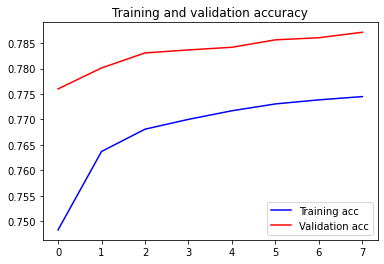

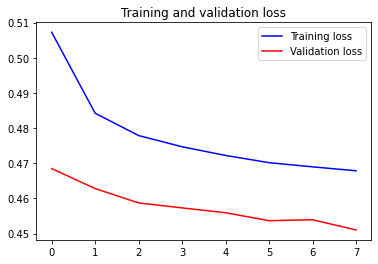

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()

####**Predict**

In [ ]:
# Classify the tweets to be positive if the predicted sentiment score is >= SENTIMENT_THRESHOLDS
# Otherwise, classify the tweets to be negative
SENTIMENT_THRESHOLD = 0.7

def decode_sentiment(score):       
    if score < SENTIMENT_THRESHOLD:
        label = NEGATIVE
    else:
        label = POSITIVE

    return label

In [ ]:
def predict(text):
    # Tokenize text
    x_test = pad_sequences(tokenizer.texts_to_sequences([text]), maxlen=MAX_SEQUENCE_LENGTH)
    # Predict
    score = model.predict([x_test])[0]
    # Decode sentiment
    label = decode_sentiment(score)

    return {"label": label, "score": float(score)}  

In [ ]:
predict("I love the music")

{'label': 'Positive', 'score': 0.9680293202400208}

In [ ]:
predict("I hate the rain")

{'label': 'Negative', 'score': 0.00993043091148138}

In [ ]:
predict("i don't know what i'm doing")

{'label': 'Negative', 'score': 0.3603038787841797}

####**Confusion Matrix**

In [ ]:
y_pred_1d = []
y_test_1d = list(sentiment_test['target'])
scores = model.predict(x_test, verbose=1, batch_size=8000)
y_pred_1d = [decode_sentiment(score) for score in scores]

320000/320000 [==============================] - 80s 250us/step


In [ ]:
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90, fontsize=22)
    plt.yticks(tick_marks, classes, fontsize=22)
    
    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=25)
    plt.xlabel('Predicted label', fontsize=25)

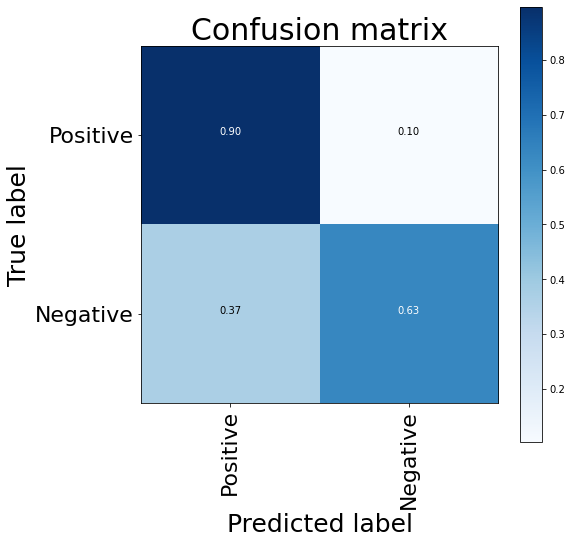

In [ ]:
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(y_test_1d, y_pred_1d)
plt.figure(figsize=(8,8))
plot_confusion_matrix(cnf_matrix, classes=sentiment_train['target'].unique(), title="Confusion matrix")
plt.show()

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

print(classification_report(y_test_1d, y_pred_1d))

              precision    recall  f1-score   support

    Negative       0.71      0.90      0.79    159494
    Positive       0.86      0.63      0.73    160506

    accuracy                           0.76    320000
   macro avg       0.78      0.76      0.76    320000
weighted avg       0.78      0.76      0.76    320000



####**Save models**

In [ ]:
KERAS_MODEL = "model.h5"
WORD2VEC_MODEL = "model.w2v"
TOKENIZER_MODEL = "tokenizer.pkl"
ENCODER_MODEL = "encoder.pkl"

In [ ]:
import pickle

model.save(KERAS_MODEL) # save both the Keras model weights & model architecture together into a H5 file
w2v_model.save(WORD2VEC_MODEL)
pickle.dump(tokenizer, open(TOKENIZER_MODEL, "wb"), protocol=0)
pickle.dump(encoder, open(ENCODER_MODEL, "wb"), protocol=0)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:254: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


#**Part 2 - Predict the sentiment of tweets**

###**Step 1. Load Keras Model** (with architecture and weights)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving model.h5 to model.h5


In [ ]:
from keras.models import load_model

model = load_model(KERAS_MODEL)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 30, 300)           74620800  
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 300)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 74,781,301
Trainable params: 160,501
Non-trainable params: 74,620,800
_________________________________________________________________


### **Step 2. Tweets Extraction** using GetOldTweets3

In [ ]:
import GetOldTweets3 as got
import pandas as pd

In [ ]:
def get_tweets(keywords, location, start_date, end_date, max_tweets):
    df_tweet_all = pd.DataFrame()

    for keyword in keywords:
        #print(keyword)
   
        # specifying tweets searching criteria 
        tweetCriteria = got.manager.TweetCriteria().setQuerySearch(keyword)\
                                   .setNear(location)\
                                   .setSince(start_date)\
                                   .setUntil(end_date)\
                                   .setMaxTweets(max_tweets)
        
        # scraping tweets based on criteria
        tweet = got.manager.TweetManager.getTweets(tweetCriteria)
        
        # extracting tweet attributes (specified in the list comprehension)
        text_tweets = [[tw.username,
                        tw.text,
                        tw.date,
                        tw.retweets,
                        tw.favorites,
                        tw.mentions,
                        tw.hashtags] for tw in tweet]

        df_tweet = pd.DataFrame(text_tweets)
        df_tweet['keyword'] = keyword
        df_tweet_all = df_tweet_all.append(df_tweet)
    
    df_tweet_all.columns = ['User','Text','Date','Favorites','Retweets','Mentions','HashTags','Search Keywords']
    
    return df_tweet_all

In [ ]:
# Fetch tweets that contains keywards from Feb 2020 to Jun 2020
# Store the extracted tweets in csv files.
keywords = ['covid']
count = 0

print("\nFetching tweets in Feb 2020.")
df = get_tweets(keywords, 'New York', start_date = "2020-02-01", end_date = "2020-02-29", max_tweets=1000).sort_values('Date',ascending=False)
df.to_csv('TweetsFeb2020.csv')
count += df.size
print(df.info())

print("\nFetching tweets in Mar 2020.")
df = get_tweets(keywords, 'New York', start_date = "2020-03-01", end_date = "2020-03-31", max_tweets=1000).sort_values('Date',ascending=False)
df.to_csv('TweetsMar2020.csv')
count += df.size
print(df.info())

print("\nFetching tweets in Apr 2020.")
df = get_tweets(keywords, 'New York', start_date = "2020-04-01", end_date = "2020-04-30", max_tweets=1000).sort_values('Date',ascending=False)
df.to_csv('TweetsApr2020.csv')
count += df.size
print(df.info())

print("\nFetching tweets in May 2020.")
df = get_tweets(keywords, 'New York', start_date = "2020-05-01", end_date = "2020-05-31", max_tweets=1000).sort_values('Date',ascending=False)
df.to_csv('TweetsMay2020.csv')
count += df.size
print(df.info())

print("\nFetching tweets in Jun 2020.")
df = get_tweets(keywords, 'New York', start_date = "2020-06-01", end_date = "2020-06-30", max_tweets=1000).sort_values('Date',ascending=False)
df.to_csv('TweetsJun2020.csv')
count += df.size
print(df.info())


Fetching tweets in Feb 2020.
<class 'pandas.core.frame.DataFrame'>
Int64Index: 107 entries, 0 to 106
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   User             107 non-null    object             
 1   Text             107 non-null    object             
 2   Date             107 non-null    datetime64[ns, UTC]
 3   Favorites        107 non-null    int64              
 4   Retweets         107 non-null    int64              
 5   Mentions         107 non-null    object             
 6   HashTags         107 non-null    object             
 7   Search Keywords  107 non-null    object             
dtypes: datetime64[ns, UTC](1), int64(2), object(5)
memory usage: 7.5+ KB
None

Fetching tweets in Mar 2020.
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype              
---  ------   

In [ ]:
print(count)  # total amount of tweets being analysed

32856


###**Step 3. Text Cleaning & Sentiment Prediction**

In [ ]:
time_periods = ["Feb 2020","Mar 2020","Apr 2020","May 2020","Jun 2020"]
all_sentiments = pd.DataFrame(index=time_periods, columns=['POSITIVE','NEGATIVE'])
all_sentiments

,POSITIVE,NEGATIVE
Feb 2020,NaN,NaN
Mar 2020,NaN,NaN
Apr 2020,NaN,NaN
May 2020,NaN,NaN
Jun 2020,NaN,NaN


In [ ]:
# Load csv files that contain tweets for each time period
from google.colab import files
uploaded = files.upload()

Saving TweetsApr2020.csv to TweetsApr2020.csv
Saving TweetsFeb2020.csv to TweetsFeb2020.csv
Saving TweetsJun2020.csv to TweetsJun2020.csv
Saving TweetsMar2020.csv to TweetsMar2020.csv
Saving TweetsMay2020.csv to TweetsMay2020.csv


In [ ]:
def get_sentiment(time_period):
    # read data from csv file
    filename = "Tweets" + time_period.replace(" ", "") + ".csv"
    tweets = pd.read_csv(filename, index_col=0)
    
    # text pre-processing
    tweets['Text'] = tweets['Text'].apply(lambda x: preprocess(x))
    tweets = tweets.drop(columns=['User', 'Date', 'Favorites', 'Retweets', 'Mentions', 'HashTags'])

    # predict sentiments
    tweets['Sentiment'] = np.nan
    tweets['Score'] = np.nan

    for i in tweets.index.values:
        prediction = predict(tweets.loc[i,'Text'])
        tweets.loc[i,'Sentiment'] = prediction.get('label')
        tweets.loc[i,'Score'] = prediction.get('score')

    # calculate the proportion of pos/neg tweets in the given month
    pos = len(tweets.loc[tweets['Sentiment'] == POSITIVE]) / len(tweets) * 100
    neg = len(tweets.loc[tweets['Sentiment'] == NEGATIVE]) / len(tweets) * 100

    all_sentiments.loc[time_period,'POSITIVE'] = pos
    all_sentiments.loc[time_period,'NEGATIVE'] = neg

In [ ]:
for time_period in time_periods:
    print(time_period)
    get_sentiment(time_period)
  
all_sentiments

Feb 2020
Mar 2020
Apr 2020
May 2020
Jun 2020


,POSITIVE,NEGATIVE
Feb 2020,28.0374,71.9626
Mar 2020,30.7,69.3
Apr 2020,32.3,67.7
May 2020,25.5,74.5
Jun 2020,22.2,77.8


###**Step 4. Visualisation**

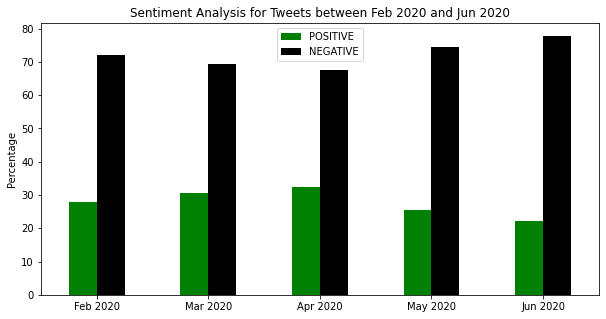

In [ ]:
ax = all_sentiments.plot.bar(rot=0, figsize=(10,5), color=['green','black'])
ax.set_ylabel("Percentage")
plt.title("Sentiment Analysis for Tweets between Feb 2020 and Jun 2020")
plt.show()